In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Sharks.csv')
df.head()

,Unnamed: 0,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Species,Case Number.1,Case Number.2,original order,Month,Place
0,0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57.0,No injury,18h,White,2018.06.25,2018.06.25,6303.0,Jun,"Oceanside,"
1,1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11.0,Minor injury,14h,NaN,2018.06.18,2018.06.18,6302.0,Jun,NaN
2,2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48.0,NaN,07h,NaN,2018.06.09,2018.06.09,6301.0,Jun,"Habush,"
3,3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,40.5,Minor injury,NaN,shark,2018.06.08,2018.06.08,6300.0,Jun,NaN
4,4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,33.0,NaN,NaN,Tiger,2018.06.04,2018.06.04,6299.0,Jun,NaN


In [3]:
df.drop(['Unnamed: 0'], axis=1).head()  #Elimino la primera columna porque no me sirve

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Species,Case Number.1,Case Number.2,original order,Month,Place
0,2018.06.25,25-Jun-2018,2018.0,Boat,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57.0,No injury,18h,White,2018.06.25,2018.06.25,6303.0,Jun,"Oceanside,"
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11.0,Minor injury,14h,NaN,2018.06.18,2018.06.18,6302.0,Jun,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48.0,NaN,07h,NaN,2018.06.09,2018.06.09,6301.0,Jun,"Habush,"
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,40.5,Minor injury,NaN,shark,2018.06.08,2018.06.08,6300.0,Jun,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,33.0,NaN,NaN,Tiger,2018.06.04,2018.06.04,6299.0,Jun,NaN


In [4]:
df.shape

(8703, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703 entries, 0 to 8702
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8703 non-null   int64  
 1   Case Number     8702 non-null   object 
 2   Date            6302 non-null   object 
 3   Year            8703 non-null   float64
 4   Type            6298 non-null   object 
 5   Country         6252 non-null   object 
 6   Area            5847 non-null   object 
 7   Location        5762 non-null   object 
 8   Activity        5758 non-null   object 
 9   Name            6092 non-null   object 
 10  Sex             8703 non-null   object 
 11  Age             8703 non-null   float64
 12  Injury          857 non-null    object 
 13  Time            2352 non-null   object 
 14  Species         3238 non-null   object 
 15  Case Number.1   6302 non-null   object 
 16  Case Number.2   6302 non-null   object 
 17  original order  6309 non-null   o

<h1>BYE  BYE  NULLS!  and WELLCOME ANÁLISIS 😎🐱‍🏍  </h1>

<h3>Análisis  AGE</h3>

In [8]:
df.Age = df.Age.interpolate() 

In [6]:
df.Age.value_counts(dropna=False)
df.Age.apply(int)

0       57
1       11
2       48
3       40
4       33
        ..
8698    15
8699    15
8700    15
8701    15
8702    15
Name: Age, Length: 8703, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

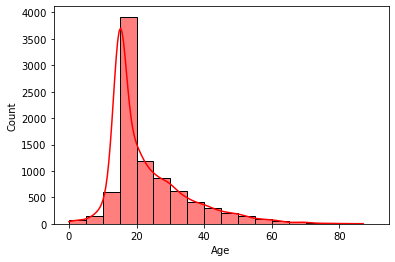

In [35]:
sns.histplot(x=df.Age, binwidth=5, kde=True, color="r" )

In [7]:
df['AGE'] = pd.cut(df.Age, bins=[0, 10, 15, 20, 30, 40, 50, 60, 90])

<AxesSubplot:xlabel='AGE', ylabel='count'>

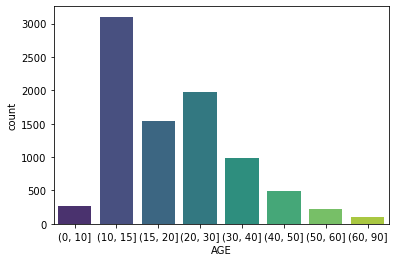

In [44]:
sns.countplot(x=df.AGE, palette='viridis')

<h3>Análisis  SEX</h3>

In [ ]:
df.Sex.value_counts(dropna=False)  #   NaN    2967

In [8]:
df.Sex = df.Sex.fillna(method='ffill', limit=200)        # FILLNA de SEX
df.Sex = df.Sex.fillna(method='bfill', limit= 200)  
df.Sex = df.Sex.fillna('Neutral')  

In [11]:
df.Sex.value_counts(dropna=False)

M          5808
Neutral    2201
F           694
Name: Sex, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Sex'>

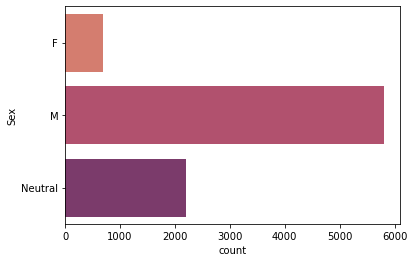

In [66]:
sns.countplot(y=df.Sex, palette="flare")

<h3>Análisis  YEAR</h3>

In [7]:
df.Year = df.Year.fillna(df.Year.median(), limit=1000)        # FILLNA de YEAR
df.Year = df.Year.fillna('')  

In [9]:
df.Year.value_counts(dropna=False)
df.Year.apply(int)

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
8698    1978
8699    1978
8700    1978
8701    1978
8702    1978
Name: Year, Length: 8703, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Count'>

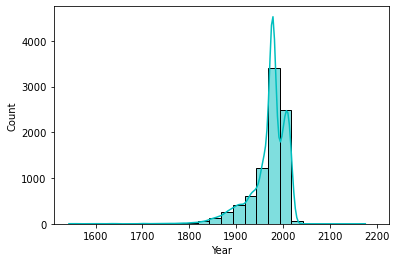

In [53]:
sns.histplot(x=df.Year, binwidth=25, kde=True, color="c" )

<h3>Análisis MONTH</h3>

In [ ]:
df.Month.value_counts(dropna=False)   #   NaN    3476

In [11]:
df.Month = df.Month.fillna(method='ffill', limit=500)        # FILLNA de MONTH
df.Month = df.Month.fillna(method='bfill', limit=500) 
df.Month = df.Month.fillna('')

In [7]:
df.Month.value_counts(dropna=False)   #   NaN    3476

       1912
Jul    1187
Oct     949
Jan     829
Aug     623
Jun     517
Apr     487
Mar     464
Nov     463
Dec     450
May     414
Feb     408
Name: Month, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='count'>

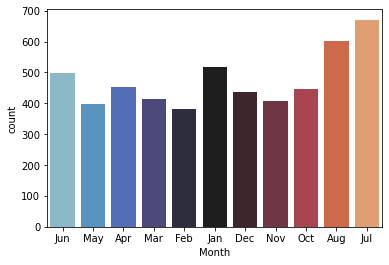

In [57]:
sns.countplot(x=df.Month, palette="icefire")

<h3>ANALISIS PLACE</h3>

In [12]:
df.Place.value_counts(dropna=False)

NaN              8345
Ahvaz,             12
Nahoon,             9
Jacksonville,       7
Jupiter,            6
                 ... 
Dorquain,           1
Duranbah,           1
Dania,              1
Pialba,             1
Swartklip,          1
Name: Place, Length: 262, dtype: int64

<h3>ANALISIS SPECIES</h3>

In [ ]:
df.Species.value_counts(dropna=False)   #   NaN     5465

In [13]:
df.Species = df.Species.fillna(method='ffill', limit=500)        # FILLNA de SPECIES
df.Species = df.Species.fillna(method='bfill', limit=500) 
df.Species = df.Species.fillna('')

In [11]:
df.Species.value_counts(dropna=False)

shark           4243
                1906
White            810
Tiger            416
not              395
Invalid          254
Bull             250
reef             111
Nurse             93
Wobbegong         76
Lemon             47
No shark          32
Porbeagle         19
Spinner           18
Galapagos         17
Angel              7
sevengill          5
Seven-gil          3
Cookiecutter       1
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

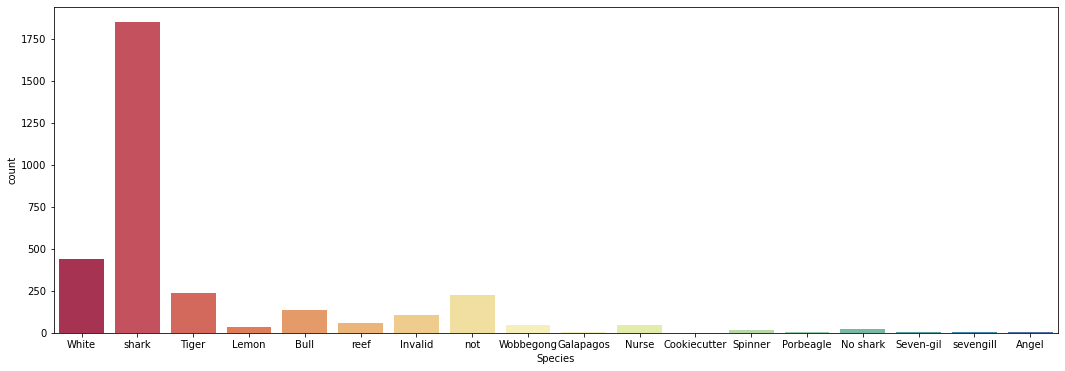

In [61]:
plt.figure(figsize=(18,6))
sns.countplot(x=df.Species, palette="Spectral")

<h3> ANÁLISIS INJURY </h3>

In [ ]:
df.Injury.value_counts(dropna=False)   # NaN       7846

In [14]:
df.Injury = df.Injury.fillna(method='ffill', limit=500)        # FILLNA de INJURY
df.Injury = df.Injury.fillna(method='bfill', limit=500) 
df.Injury = df.Injury.fillna('')

In [9]:
df.Injury.value_counts(dropna=False)

No injury       5987
                1928
Minor injury     713
Major injury      75
Name: Injury, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Injury'>

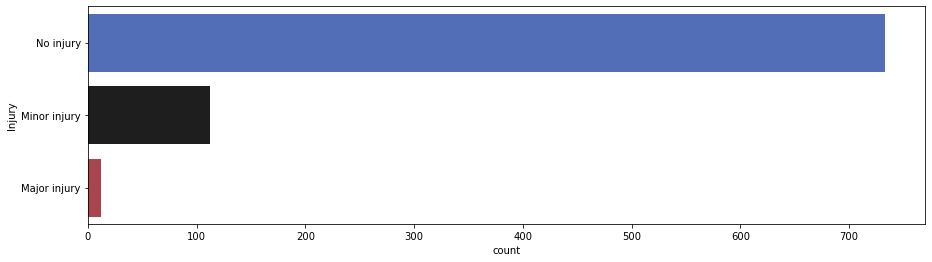

In [79]:
plt.figure(figsize=(15,4))
sns.countplot(y=df.Injury, palette="icefire")

<h3>ANÁLISI TIME</h3>

In [ ]:
df.Time.value_counts(dropna=False)    #  NaN    6351

In [15]:
df.Time = df.Time.fillna(method='ffill', limit=1000)        # FILLNA de TIME
df.Time = df.Time.fillna(method='bfill', limit=1000) 
df.Time = df.Time.fillna('')

In [13]:
df.Time.value_counts(dropna=False) 

       1502
18h    1323
15h     714
16h     641
12h     591
13h     570
11h     563
14h     562
17h     450
10h     444
09h     312
08h     229
07h     196
06h     132
19h     129
01h      88
20h      75
05h      67
03h      27
02h      24
21h      20
04h      19
23h      17
22h       7
00h       1
Name: Time, dtype: int64

<AxesSubplot:xlabel='Time', ylabel='count'>

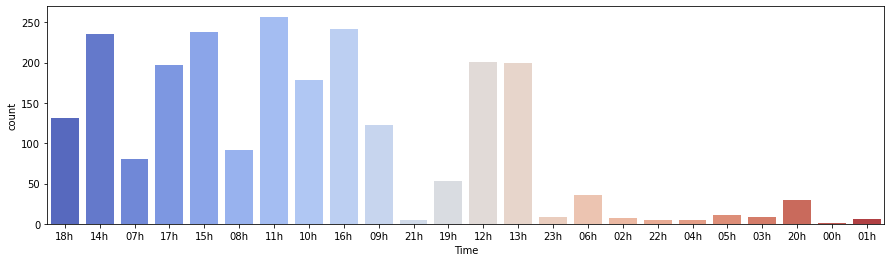

In [83]:
plt.figure(figsize=(15,4))
sns.countplot(x=df.Time, palette="coolwarm").sor

<h3> ANÁLISIS TYPE</h3>

In [ ]:
df.Type.value_counts(dropna=False)    #NaN    2405

In [16]:
df.Type = df.Type.fillna(method='ffill', limit=500)        # FILLNA de INJURY
df.Type = df.Type.fillna(method='bfill', limit=500) 
df.Type = df.Type.fillna('')

In [15]:
df.Type.value_counts(dropna=False) 

Unprovoked      5096
                1901
Provoked         575
Invalid          551
Boat             341
Sea Disaster     239
Name: Type, dtype: int64

<h1> CONCLUSIONES 🥋 </h1>

In [17]:
df.tail(10)

,Unnamed: 0,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Age,Injury,Time,Species,Case Number.1,Case Number.2,original order,Month,Place,AGE
8693,8693,0,NaN,1978.0,,NaN,NaN,NaN,NaN,NaN,...,15.0,,,,NaN,NaN,NaN,,NaN,"(10, 15]"
8694,8694,0,NaN,1978.0,,NaN,NaN,NaN,NaN,NaN,...,15.0,,,,NaN,NaN,NaN,,NaN,"(10, 15]"
8695,8695,0,NaN,1978.0,,NaN,NaN,NaN,NaN,NaN,...,15.0,,,,NaN,NaN,NaN,,NaN,"(10, 15]"
8696,8696,0,NaN,1978.0,,NaN,NaN,NaN,NaN,NaN,...,15.0,,,,NaN,NaN,NaN,,NaN,"(10, 15]"
8697,8697,0,NaN,1978.0,,NaN,NaN,NaN,NaN,NaN,...,15.0,,,,NaN,NaN,NaN,,NaN,"(10, 15]"
8698,8698,0,NaN,1978.0,,NaN,NaN,NaN,NaN,NaN,...,15.0,,,,NaN,NaN,NaN,,NaN,"(10, 15]"
8699,8699,0,NaN,1978.0,,NaN,NaN,NaN,NaN,NaN,...,15.0,,,,NaN,NaN,NaN,,NaN,"(10, 15]"
8700,8700,0,NaN,1978.0,,NaN,NaN,NaN,NaN,NaN,...,15.0,,,,NaN,NaN,NaN,,NaN,"(10, 15]"
8701,8701,0,NaN,1978.0,,NaN,NaN,NaN,NaN,NaN,...,15.0,,,,NaN,NaN,NaN,,NaN,"(10, 15]"
8702,25722,xx,NaN,1978.0,,NaN,NaN,NaN,NaN,NaN,...,15.0,,,,NaN,NaN,NaN,,NaN,"(10, 15]"


In [18]:
df.describe().round(2)

,Unnamed: 0,Year,Age
count,8703.00,8703.00,8703.00
mean,4352.96,1969.94,22.89
std,2522.48,41.55,11.58
min,0.00,1543.00,0.00
25%,2175.50,1959.00,15.00
50%,4351.00,1978.00,18.60
75%,6526.50,1998.00,28.00
max,25722.00,2176.00,87.00


<h1>1. DEMOGRAPHICS </h1>

<p>Focus on columns 'Age' and 'Sex'</p>

<AxesSubplot:xlabel='AGE', ylabel='count'>

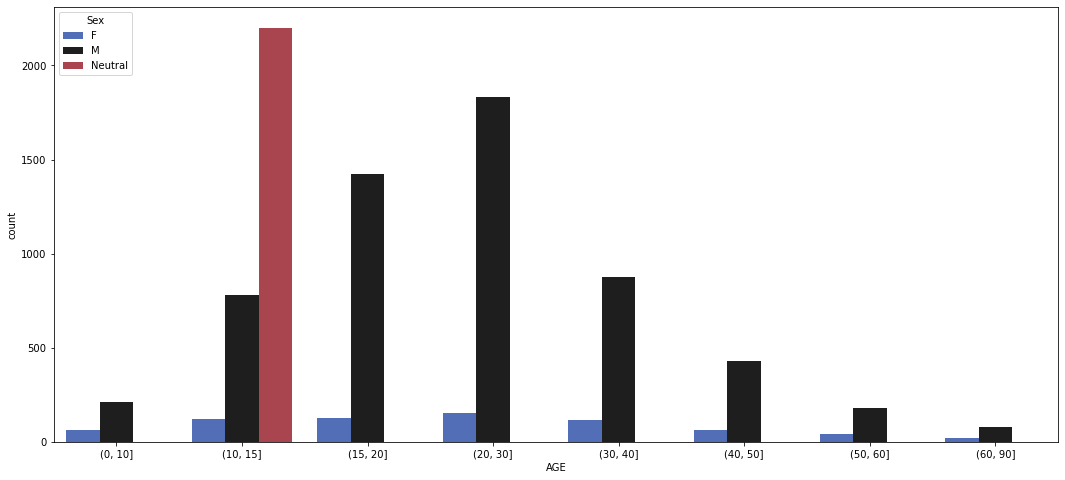

In [90]:
plt.figure(figsize=(18,8))
sns.countplot(x=df.AGE, hue=df.Sex, palette='icefire')

<h1>2. SPACE-TIME- STATISTICS</h1>

<span>Focus on 'Date' and 'Location' columns. 
    for the column 'Date' I create two columns => 'Year' and 'Month'
    for the column 'Location' I create one columns => 'Place'
</span>

<AxesSubplot:xlabel='Type', ylabel='Age'>

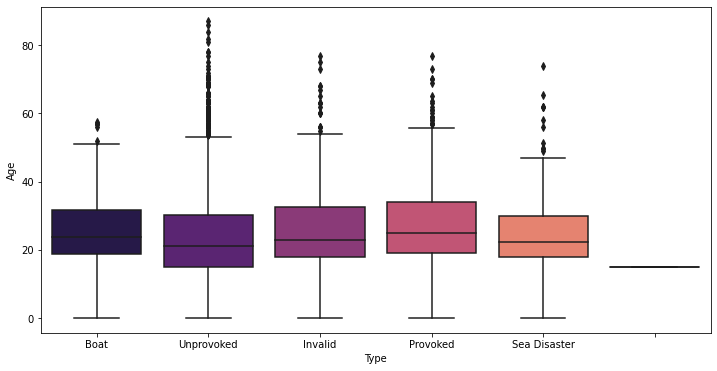

In [53]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Type', y='Age', data=df, palette='magma')

plt.figure(figsize=(15,8))
<h1>3. FREE PROJECT</h1>

<AxesSubplot:xlabel='Species', ylabel='Year'>

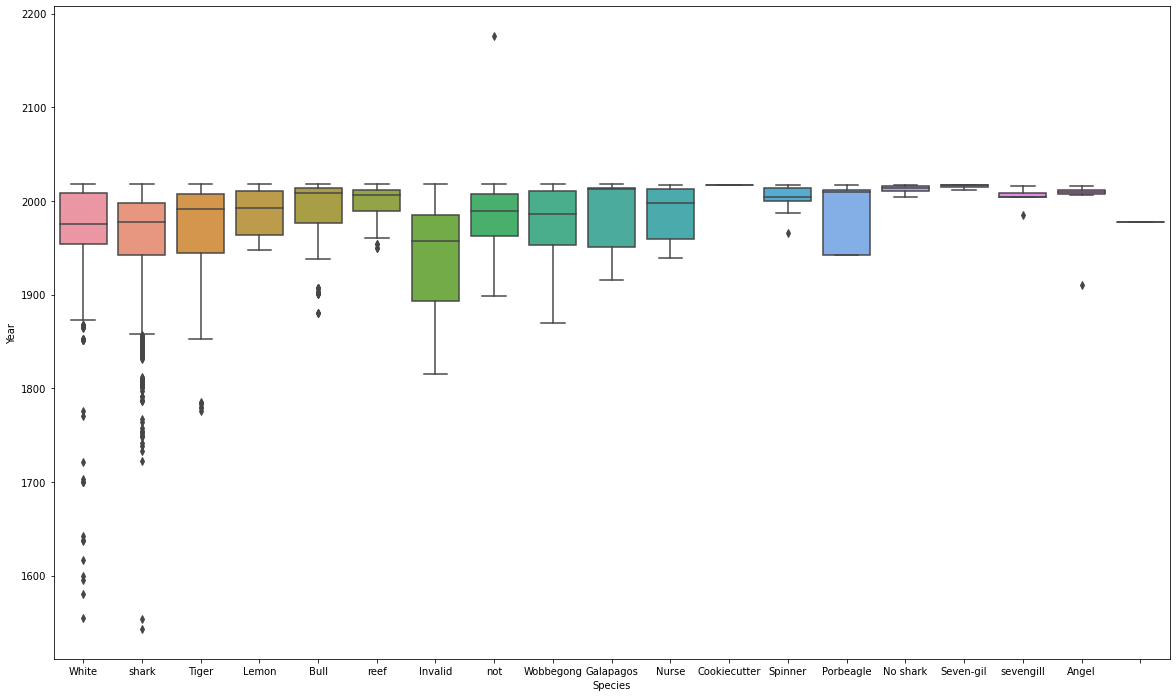

In [46]:
plt.figure(figsize=(20,12))
sns.boxplot(x='Species', y='Year', data=df)

<AxesSubplot:xlabel='Age', ylabel='Year'>

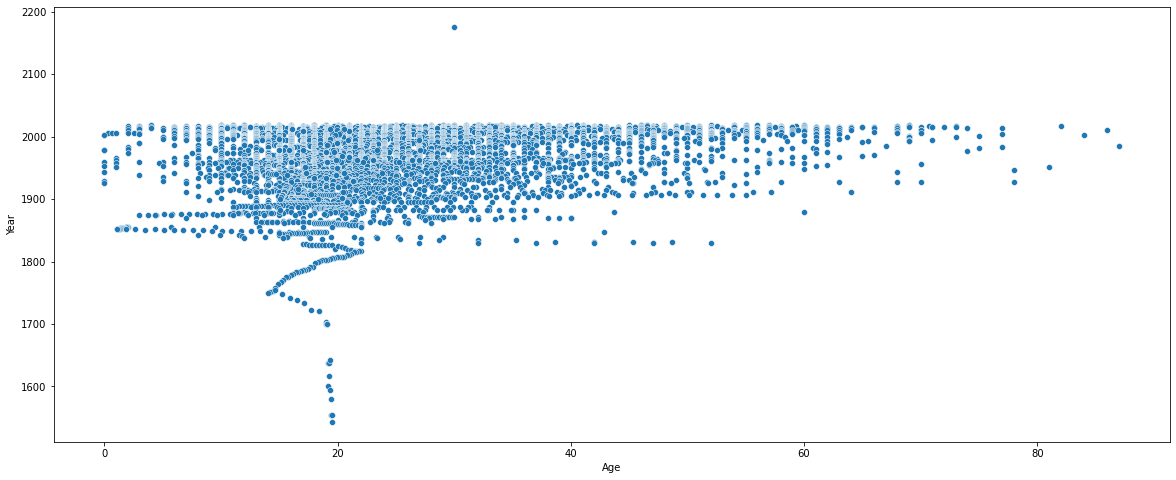

In [35]:
plt.figure(figsize=(20,8))
sns.scatterplot (x= df.Age, y=df.Year, markers= '^', palette="mako" )

<h1></h1>

<h1></h1>